In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Datacamp Link](https://www.datacamp.com/courses/forecasting-using-arima-models-in-python)

In [0]:
! pip3 install pmdarima

#  Chapter 1 - ARMA Models

Dive straight in and learn about the most important properties of time series. You'll learn about stationarity and how this is important for ARMA models. You'll learn how to test for stationarity by eye and with a standard statistical test. Finally, you'll learn the basic structure of ARMA models and use this to generate some ARMA data and fit an ARMA model. 

### Intro to time series and stationarity


In [0]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
                 index_col='date', 
                 parse_dates=True)

In [3]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


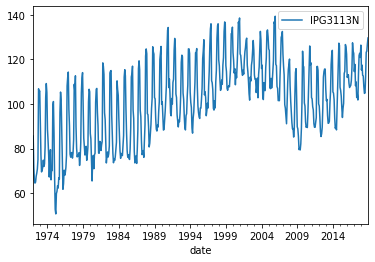

In [4]:
# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

####Train-test splits

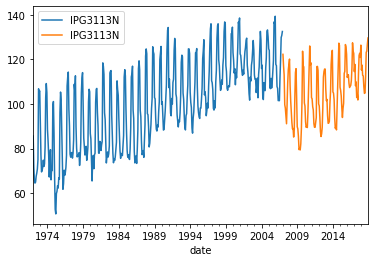

In [5]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

####Is it stationary

The DataFrame, `df1` is a time series of Amazon stock close price.

In [0]:
df1 = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)

In [7]:
df1.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


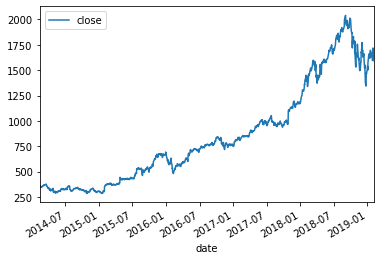

In [8]:
df1.plot()
plt.show()

The DataFrame, `df3` is a time series showing the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

In [83]:
df3 = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=True)
df3 = df3.drop('Year', axis=1)
df3.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


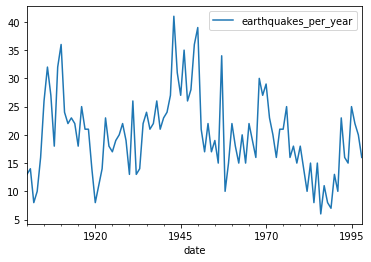

In [32]:
df3.plot()
plt.show()

###Making time series stationary


####Augmented Dicky-Fuller


In [0]:
earthquake = df3

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

In [0]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

In [38]:
result

(-3.183192251191782,
 0.02097842525600371,
 2,
 96,
 {'1%': -3.5003788874873405,
  '10%': -2.5830997960069446,
  '5%': -2.8921519665075235},
 549.0681467660734)

In [39]:
# Print test statistic
print(result[0])

-3.183192251191782


In [40]:
# Print p-value
print(result[1])

0.02097842525600371


In [41]:
# Print critical values
print(result[4]) 

{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


####Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. 

In [0]:
# dataset not available

In [0]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])



```
<script.py> output:
    ADF Statistic: 5.297698878151182
    p-value: 1.0
```



- Take the first difference of `city` dropping the `NaN` values. Assign this to `city_stationary` and run the test again.

In [0]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])



```
<script.py> output:
    ADF Statistic: -0.8146211646181589
    p-value: 0.8147894381484937
```



- Take the second difference of `city`, by applying the `.diff()` method twice and drop the `NaN` values.

In [0]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])



```
<script.py> output:
    ADF Statistic: -6.43364603291874
    p-value: 1.673449851040049e-08
```

**Comment:**

A p-value of 0.000000016 is very significant! This time series is now stationary and ready for modeling!


####Other tranforms

A classic way of transforming stock time series is the log-return of the series. 

In [47]:
amazon = df1
amazon[:3]

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26


The Amazon stock time series has already been loaded for you as `amazon`. You can calculate the log-return of this DataFrame by substituting:

- $y_{t}$→ `amazon`
- $y_{t−1}$→ `amazon.shift(1)`
- $log()$→ `np.log()`

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [46]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff().dropna()
amazon_diff[:3]

,close
date,
2019-02-07,26.15
2019-02-06,25.89
2019-02-05,18.55


In [48]:
# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811258, 2.331271725487009e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [52]:
# Calculate log-return and drop nans
amazon_log = np.log((amazon/amazon.shift(1)).dropna())
amazon_log[:3]

,close
date,
2019-02-07,0.016331
2019-02-06,0.015910
2019-02-05,0.011246


In [53]:
# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


**Comments:**

Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more negative test statistic. This means the log-return tranformation is better.

###Intro to AR, MA and ARMA models


####Generating ARMA data

In this exercise you will generate 100 days worth of AR/MA/ARMA data. 

Remember:

- The first value of each list of AR and MA coefficients must be 1 for the lag-0 term.
- For any model ARMA(p,q), the list `ar_coefs` will have p+1 values and the `ma_coefs` will have q+1 values.

1. Set `ar_coefs` and `ma_coefs` for an MA(1) model with MA lag-1 coefficient of -0.7. Generate a time series of 100 values.

In [0]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

In [0]:
# Import data generation function and set random seed# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

In [58]:
y[:3]

array([ 0.81217268, -0.87439908, -0.04997113])

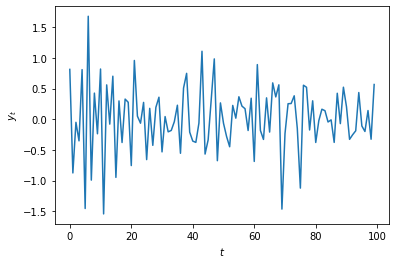

In [57]:
plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

2. Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

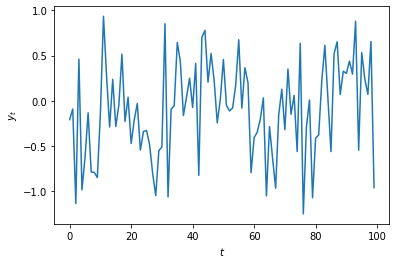

In [59]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

3.Set the coefficients for a model with form

$yt=−0.2y_{t−1}+0.3ϵ_{t−1}+0.4ϵ_{t−2}+ϵ_{t}$ .

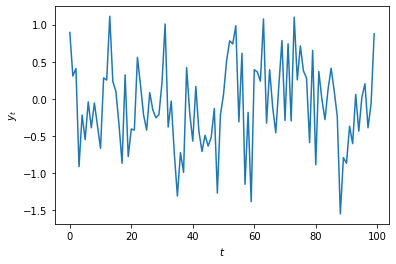

In [60]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

####Fitting Prelude

Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In [0]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

In [63]:
results

# Chapter 2 - Fitting the Future

What lies ahead in this chapter is you predicting what lies ahead in your data. You'll learn how to use the elegant statsmodels package to fit ARMA, ARIMA and ARMAX models. Then you'll use your models to predict the uncertain future of stock prices! 

###Fitting time series models


####Fitting AR and MA models

In [80]:
sample.head()

,timeseries_1,timeseries_2
0,-0.183108,-0.183108
1,-0.245540,-0.117365
2,-0.258830,-0.218789
3,-0.279635,-0.169041
4,-0.384736,-0.282374


- Fit an AR(2) model to the `'timeseries_1'` column of `sample`.
- Print a summary of the fitted model.

In [81]:
# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 148.855
Method:                       css-mle   S.D. of innovations              0.208
Date:                Sat, 18 Jan 2020   AIC                           -289.709
Time:                        06:58:25   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1.timeseries_1     0.8980      0.030     29.510      0.000       0.838       0.958
ar.L2.timeseries_1  

- Fit an MA(3) model to the `'timeseries_2'` column of `sample`.

In [82]:
# Instantiate the model
model = ARMA(sample['timeseries_2'], order=(0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood                 149.007
Method:                       css-mle   S.D. of innovations              0.208
Date:                Sat, 18 Jan 2020   AIC                           -288.014
Time:                        06:59:13   BIC                           -263.475
Sample:                             0   HQIC                          -278.687
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0018      0.012     -0.159      0.874      -0.024       0.021
ma.L1.timeseries_2     0.1995      0.031      6.352      0.000       0.138       0.261
ma.L2.timeseries_2  

####Fitting an ARMA model


In [85]:
earthquake.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


In [86]:
# Instantiate the model
model = ARMA(earthquake, order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Sat, 18 Jan 2020   AIC                            643.345
Time:                          07:00:25   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


####Fitting an ARMAX model

In [111]:
hospital.head()

,wait_times_hrs,nurse_count
0,1.747261,1.0
1,1.664634,1.0
2,1.647047,1.0
3,1.619512,1.0
4,1.480415,1.0


In [112]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2,1), 
             exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Sat, 18 Jan 2020   AIC                             35.668
Time:                        07:15:00   BIC                             54.411
Sample:                             0   HQIC                            43.275
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

###Forecasting

####Generating one-step-ahead predictions

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:
# Instantiate the model
model = SARIMAX(amazon, order=(3, 1, 3), seasonal_order=(1, 0, 1, 7))

# Fit the model
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [117]:
# Print model fit summary
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             close   No. Observations:                 1259
Model:             SARIMAX(3, 1, 3)x(1, 0, 1, 7)   Log Likelihood               -5529.218
Date:                           Sat, 18 Jan 2020   AIC                          11076.436
Time:                                   07:21:56   BIC                          11122.672
Sample:                                        0   HQIC                         11093.812
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1456      0.040      3.611      0.000       0.067       0.225
ar.L2          0.0051      0.043      0.121

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

A model has already been fitted to the Amazon data for you. 

In [0]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

In [0]:
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

In [125]:
mean_forecast[:3]

date
2014-03-24    352.880157
2014-03-21    352.266778
2014-03-20    362.562413
dtype: float64

In [0]:
# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

In [127]:
confidence_intervals[:3]

,lower close,upper close
date,,
2014-03-24,315.043573,390.716741
2014-03-21,314.430194,390.103362
2014-03-20,324.725829,400.398997


In [0]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

In [129]:
# Print best estimate predictions
print(mean_forecast)

date
2014-03-24    352.880157
2014-03-21    352.266778
2014-03-20    362.562413
2014-03-19    370.368041
2014-03-18    372.959617
2014-03-17    377.027718
2014-03-14    373.423882
2014-03-13    373.781733
2014-03-12    373.180950
2014-03-11    372.516219
2014-03-10    368.979653
2014-03-07    369.173447
2014-03-06    370.010984
2014-03-05    371.734594
2014-03-04    373.313130
2014-03-03    366.036112
2014-02-28    360.974021
2014-02-27    361.357977
2014-02-26    357.885813
2014-02-25    358.482161
2014-02-24    358.777740
2014-02-21    353.703891
2014-02-20    348.674931
2014-02-19    349.883513
2014-02-18    345.268620
2014-02-14    351.783671
2014-02-13    356.549672
2014-02-12    359.024574
2014-02-11    351.077832
2014-02-10    363.440386
dtype: float64


####Plotting one-step-ahead predictions


The `lower_limits`, `upper_limits` and `amazon` DataFrames as well as your mean prediction `mean_forecast` that you created in the last exercise are available in your environment.

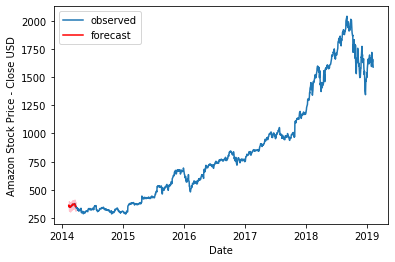

In [130]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

####Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

In [131]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2014-03-24    352.880157
2014-03-21    353.300242
2014-03-20    355.167710
2014-03-19    356.955357
2014-03-18    356.813376
2014-03-17    355.108626
2014-03-14    353.352247
2014-03-13    353.014255
2014-03-12    354.643646
2014-03-11    356.515405
2014-03-10    356.967083
2014-03-07    355.538693
2014-03-06    353.636094
2014-03-05    353.047514
2014-03-04    354.049900
2014-03-03    356.053223
2014-02-28    356.928582
2014-02-27    356.030981
2014-02-26    354.064241
2014-02-25    352.977288
2014-02-24    353.720149
2014-02-21    355.415337
2014-02-20    356.783168
2014-02-19    356.363968
2014-02-18    354.653673
2014-02-14    353.137672
2014-02-13    353.282678
2014-02-12    354.937776
2014-02-11    356.372371
2014-02-10    356.587621
dtype: float64


####Plotting dynamic forecasts


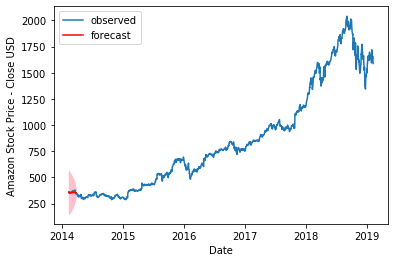

In [132]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

###Intro to ARIMA models


####Differencing and fitting ARMA


In [134]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [135]:
# Print fit summary
print(arma_results.summary())

                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Sat, 18 Jan 2020   AIC                          11079.308
Time:                        07:29:36   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

####Unrolling ARMA forecast


In [136]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [137]:
arma_diff_forecast

1258   -0.870613
1259    0.588451
1260   -0.776591
1261    0.592053
1262   -0.704626
1263    0.582079
1264   -0.647286
1265    0.564213
1266   -0.599842
1267    0.542008
dtype: float64

In [0]:
# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

In [0]:
# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

In [141]:
# Print forecast
print(arma_value_forecast)

1258    359.999387
1259    360.587838
1260    359.811247
1261    360.403300
1262    359.698675
1263    360.280754
1264    359.633467
1265    360.197681
1266    359.597839
1267    360.139847
dtype: float64


####Fitting an ARIMA model


- Create an ARIMA(2,1,2) model, using the `SARIMAX` class, passing it the Amazon stocks data `amazon`.
- Fit the model.
- Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to `arima_value_forecast`.

In [142]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [143]:
# Print forecast
print(arima_value_forecast)

1259    359.999494
1260    360.588016
1261    359.811454
1262    360.403575
1263    359.698924
1264    360.281080
1265    359.633731
1266    360.198036
1267    359.598102
1268    360.140218
dtype: float64


# Chapter 3 - The Best of the Best Models

In this chapter, you will become a modeler of discerning taste. You'll learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you'll learn how to choose the best model from this fitted selection. You'll also learn a great framework for structuring your time series projects. 

###Intro to ACF and PACF


####AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. 

In [0]:
date_rng = pd.date_range(start='1/1/2013', end='9/27/2015')

In [0]:
# remove nan
df = df.fillna('mean')

In [241]:
df

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023
...,...
2015-09-23,-0.043514
2015-09-24,-1.651165
2015-09-25,0.738258
2015-09-26,-0.350327


In [0]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

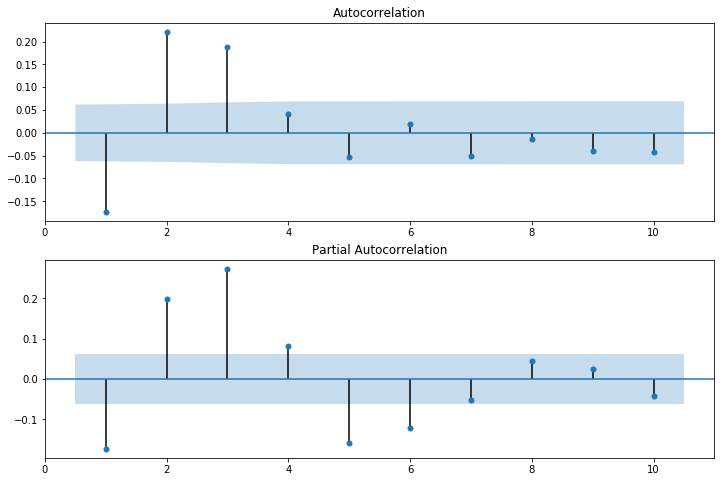

In [243]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

####Order of earthquakes

In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

.|AR(p)	|MA(q)	|ARMA(p,q)
---|---|---|---
ACF	|Tails off	|Cuts off after lag q	|Tails off
PACF	|Cuts off after lag p	|Tails off	|Tails off

- Plot the ACF and the PACF of the earthquakes time series `earthquake` up to a lag of 15 steps and don't plot the zeroth lag.

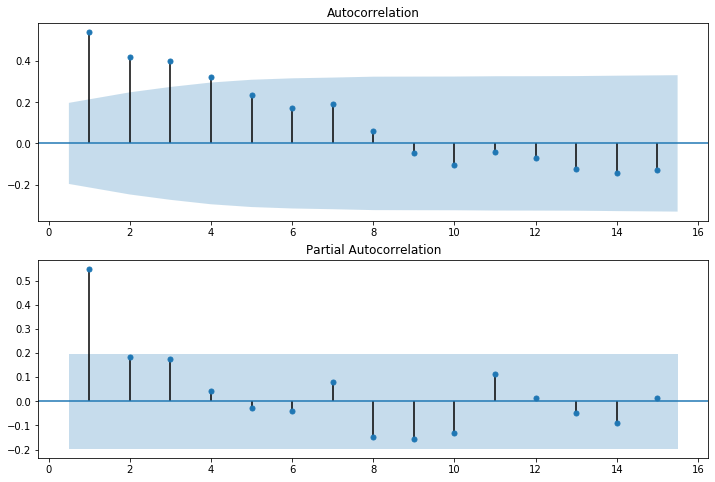

In [175]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

- Create a model object for the earthquakes time series. Select the most appropriate order using the ACF/PACF plots.

In [180]:
# Instantiate model
model = SARIMAX(earthquake, order =(1,0,0))

# Train model
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [181]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Sat, 18 Jan 2020   AIC                            666.646
Time:                          08:44:02   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (Q):                       51.06   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.11   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###Intro to AIC and BIC


####Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

In [244]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

####Choosing order with AIC and BIC


In [246]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929014
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236400  2979.051910
1  0  1  2978.726909  2988.542420
0  0  0  2996.526734  3001.434489


In [247]:
# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929014
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236400  2979.051910
1  0  1  2978.726909  2988.542420
0  0  0  2996.526734  3001.434489


####AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. 

In [191]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812073 804.8644124814765
0 2 761.0674787503889 768.8528383007927
1 0 666.6455255041611 671.8357652044303
1 1 647.1322999673815 654.9176595177853
1 2 648.7385664620634 659.1190458626018
2 0 656.0283744146391 663.8137339650428
2 1 648.8428399959242 659.2233193964626


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2 2 648.8506443429098 661.8262435935828


###Model diagnostics


####Mean absolute error

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.755625669545705


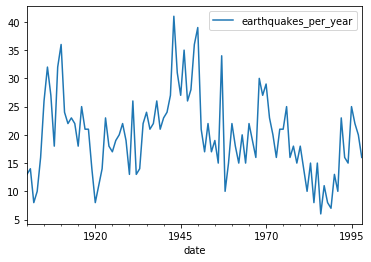

In [192]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

In [193]:
# Print mean absolute error
print(mae)

4.755625669545705


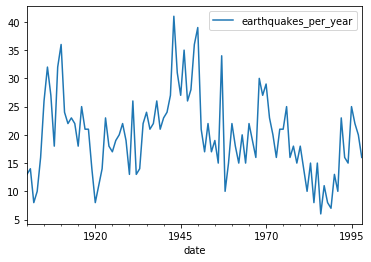

In [194]:
# Make plot of time series for comparison
earthquake.plot()
plt.show()

####Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Test|	Null hypothesis	|P-value name
---|---|---
Ljung-Box	|There are no correlations in the residual|Prob(Q)
Jarque-Bera	|The residuals are normally distributed	|Prob(JB)

In [248]:
# Create and fit model
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1421.678
Date:                Sat, 18 Jan 2020   AIC                           2853.356
Time:                        09:20:28   BIC                           2877.895
Sample:                    01-01-2013   HQIC                          2862.682
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0719      0.110     -0.653      0.514      -0.288       0.144
ar.L2          0.2542      0.034      7.573      0.000       0.188       0.320
ar.L3          0.2528      0.039      6.557      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [249]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1462.150
Date:                Sat, 18 Jan 2020   AIC                           2930.299
Time:                        09:20:31   BIC                           2945.023
Sample:                    01-01-2013   HQIC                          2935.895
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1361      0.031     -4.400      0.000      -0.197      -0.075
ar.L2          0.2005      0.032      6.355      0.000       0.139       0.262
sigma2         1.0901      0.043     25.360      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


####Plot diagnostics

Here is a reminder of what you would like to see in each of the plots for a model that fits well:


Test	|Good fit
---|---
Standardized residual	|There are no obvious patterns in the residuals
Histogram plus kde estimate	|The KDE curve should be very similar to the normal distribution
Normal Q-Q	|Most of the data points should lie on the straight line
Correlogram	|95% of correlations for lag greater than one should not be significant

In [0]:
df = df[:300]

In [223]:
df 

,1
2013-01-01,1.62435
2013-01-02,1.33746
2013-01-03,0.784396
2013-01-04,-0.401674
2013-01-05,0.215209
...,...
2013-10-23,27.7329
2013-10-24,28.0758
2013-10-25,28.9217
2013-10-26,28.1416


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


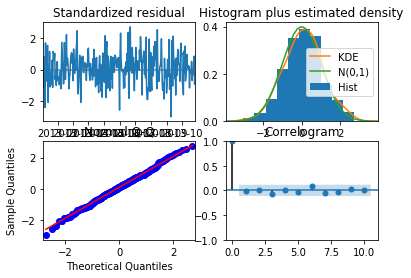

In [227]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

###Box-Jenkins method


####Identification

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

In [278]:
savings

,savings
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2
...,...
1979-04-01,5
1979-07-01,4.8
1979-10-01,4.7


The time series has been loaded in as a DataFrame `savings` and the `adfuller()` function has been imported.

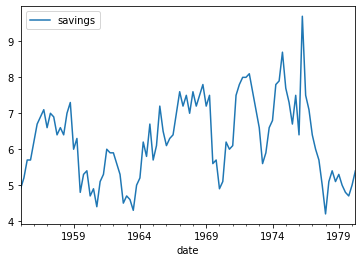

In [279]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

In [281]:
result

(-3.18589909624214,
 0.020815541644114133,
 2,
 99,
 {'1%': -3.498198082189098,
  '10%': -2.5825959973472097,
  '5%': -2.891208211860468},
 188.16866622396873)

In [282]:
# Print test statistic
print(result[0])

# Print p-value
print(result[1])

-3.18589909624214
0.020815541644114133


####Identification II

You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

In [0]:
savings = savings.fillna('mean')

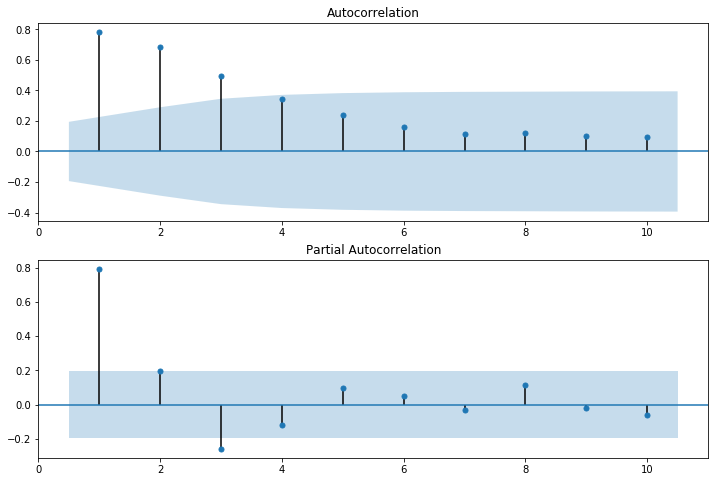

In [286]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

####Estimation

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

In [289]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.0697097688692 274.944628208722
0 2 232.16782676455583 242.66771801769292
0 3 217.59720511188743 230.7220691783088
1 0 216.20348062499878 224.0783990648516
1 1 215.70038963866142 226.2002808917985
1 2 207.65298608432607 220.77785015074744
1 3 209.57498691600568 225.32482379571132
2 0 213.97232327543216 224.47221452856925
2 1 213.43035679042714 226.5552208568485
2 2 209.5790343679234 225.32887124762902
2 3 211.57503208838145 229.94984178137133
3 0 209.54493107912012 222.66979514554146
3 1 210.82147634943578 226.57131322914142
3 2 211.45759881821468 229.83240851120456
3 3 213.54389188801392 234.54367439428808


####Diagnostics

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

- Retrain the ARMA(1,2) model on the time series, setting the trend to constant.
- Create the 4 standard diagnostics plots.
- Print the model residual summary statistics.

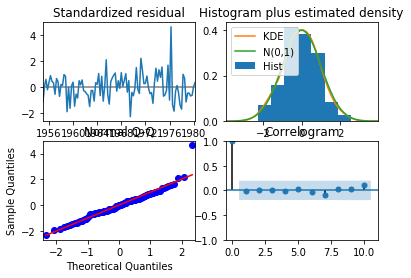

In [290]:
# Create and fit model
model = SARIMAX(savings, order=(1,0,2), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [291]:
# Print summary
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sat, 18 Jan 2020   AIC                            207.653
Time:                        09:42:45   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

# Chapter 4 - Seasonal ARIMA Models

In this final chapter, you'll learn how to use seasonal ARIMA models to fit more complex data. You'll learn how to decompose this data into seasonal and non-seasonal parts and then you'll get the chance to utilize all your ARIMA tools on one last global forecast challenge. 

###Seasonal time series


####Seasonal decompose


In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

In [0]:
milk_production = pd.read_csv('milk_production.csv', index_col='date', parse_dates=True)

In [293]:
milk_production

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


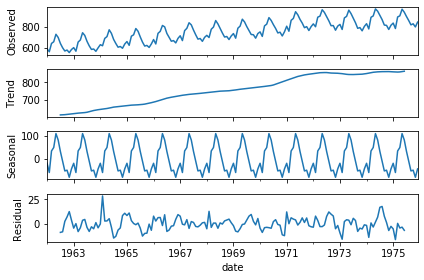

In [296]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

####Seasonal ACF and PACF

In this exercise you will use the ACF and PACF to test this data for seasonality.

In [299]:
water = pd.DataFrame([date, water_consumers]).T
water = water.rename({0:'date', 1:'water_consumers'}, axis=1)
water = water.set_index('date')
water

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313
...,...
1993-12-01,32256
1994-01-01,27517
1994-02-01,33454


- Plot the ACF of the `'water_consumers'` column of the time series up to 25 lags.

In [0]:
water = water.fillna('mean')

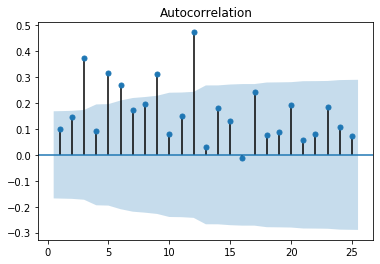

In [303]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

- Subtract a 15 step rolling mean from the original time series and assign this to `water_2`
- Drop the `NaN` values from `water_2`

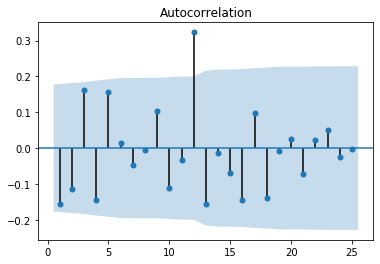

In [304]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

###SARIMA models


####Fitting SARIMA models


In [0]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

In [0]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

In [0]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

####Choosing SARIMA order

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

.|AR(p)	|MA(q)|	ARMA(p,q)
---|---|---|---
ACF	|Tails off|	Cuts off after lag q|	Tails off
PACF|	Cuts off after lag p|	Tails off|	Tails off

In [314]:
aus_employment = pd.DataFrame([date, people_employed]).T
aus_employment = aus_employment.rename({0:'date', 1:'people_employed'}, axis=1)
aus_employment = aus_employment.set_index('date')
aus_employment

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3
...,...
1990-11-01,7941.2
1990-12-01,7668.8
1991-01-01,7739.3


In [0]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

The DataFrame `aus_employment` and the functions `plot_acf()` and `plot_pacf()` are available in your environment.

In [0]:
aus_employment_diff = aus_employment_diff.fillna('mean')

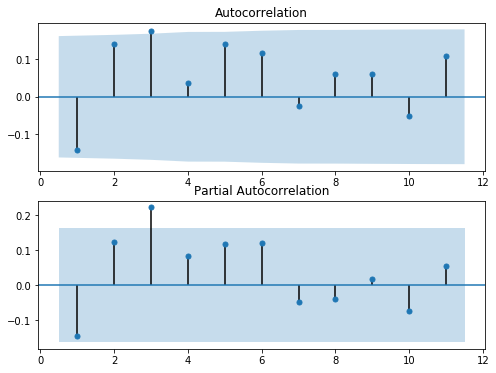

In [317]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show()

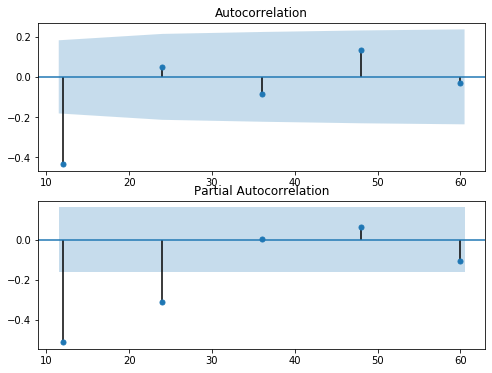

In [318]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, ax=ax2)

plt.show()

####SARIMA vs ARIMA forecasts

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

In [326]:
wisconsin_test = pd.DataFrame([date, people_employed]).T
wisconsin_test = wisconsin_test.rename({0:'date', 1:'people_employed'}, axis=1)
wisconsin_test = wisconsin_test.set_index('date')
wisconsin_test = wisconsin_test.fillna('mean')
wisconsin_test[:3]

,people_employed
date,
1973-10-01,374.5
1973-11-01,380.2
1973-12-01,384.6


In [0]:
wisconsin_test = np.asarray(wisconsin_test)

In [340]:
# Instantiate the model
model = SARIMAX(wisconsin_test, order=(3, 1, 2))

# Fit the model
arima_results = model.fit()

# Print summary
print(arima_results.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 2)   Log Likelihood                 -81.286
Date:                Sat, 18 Jan 2020   AIC                            174.572
Time:                        10:23:42   BIC                            181.640
Sample:                             0   HQIC                           176.447
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0648      0.687     -0.094      0.925      -1.411       1.281
ar.L2          0.4366      0.622      0.702      0.483      -0.782       1.655
ar.L3         -0.4984      0.488     -1.021      0.3

In [341]:
# Create a SARIMAX model
model = SARIMAX(wisconsin_test, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))
start_params = np.r_[[0] * (model.k_params - 1), 1]

# Fit the model
sarima_results = model.fit(start_params=start_params)

# Print the results summary
print(sarima_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   25
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -18.495
Date:                            Sat, 18 Jan 2020   AIC                             44.990
Time:                                    10:23:44   BIC                             46.929
Sample:                                         0   HQIC                            44.272
                                             - 25                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9936     20.245      0.049      0.961     -38.686      40.673
ar.S.L12      -0.9794    105.968   

The fitted ARIMA results object and the fitted SARIMA results object are available in your environment as `arima_results` and `sarima_results`.

In [0]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

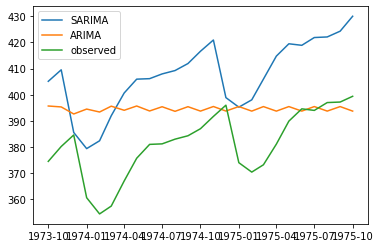

In [357]:
# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

###Automation and saving


####Automated model selection
The `pmdarima` package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

In [0]:
# Import pmdarima as pm
import pmdarima as pm

In [0]:
# different from original dataset
df1, df2, df3 = df, df, df

- Model the time series `df1` with period 7 days and set first order seasonal differencing and no non-seasonal differencing.

In [367]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)         

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 7); AIC=2830.042, BIC=2869.248, Fit time=10.949 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=3710.444, BIC=3720.245, Fit time=0.077 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 7); AIC=3399.768, BIC=3419.371, Fit time=0.822 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=2997.065, BIC=3016.668, Fit time=3.200 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=3708.444, BIC=3713.345, Fit time=0.083 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 1, 7); AIC=2862.782, BIC=2897.087, Fit time=10.410 seconds
Near non-invertible roots for order (2, 0, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(2, 0, 2) seasonal_orde

In [368]:
# Print model summary
print(model1.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(1, 1, 1, 7)   Log Likelihood               -1407.021
Date:                           Sat, 18 Jan 2020   AIC                           2830.042
Time:                                   11:18:28   BIC                           2869.248
Sample:                                        0   HQIC                          2844.948
                                          - 1000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.001     -0.560      0.575      -0.002       0.001
ar.L1          0.4887      0.064      7.646

- Create a model to fit `df2`. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.

In [369]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False, 
                      d=1, 
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=2966.509, BIC=2995.949, Fit time=0.512 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=3844.292, BIC=3854.105, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=3256.791, BIC=3271.511, Fit time=0.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=3002.406, BIC=3017.126, Fit time=0.931 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=3844.292, BIC=3854.105, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=2978.738, BIC=3003.272, Fit time=0.548 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=2964.761, BIC=2989.295, Fit time=0.347 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=2977.099, BIC=2996.726, Fit time=

In [370]:
# Print model summary
print(model2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1477.380
Date:                Sat, 18 Jan 2020   AIC                           2964.761
Time:                        11:18:31   BIC                           2989.295
Sample:                             0   HQIC                          2974.086
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0011      0.021     -0.050      0.960      -0.042       0.040
ar.L1         -0.7058      0.051    -13.721      0.000      -0.807      -0.605
ar.L2         -0.2901      0.044     -6.580      0.0

- Fit a SARIMAX(p,1,q)(P,1,Q)7 model to the data setting `start_p, start_q, max_p, max_q, max_P` and `max_Q `to 1.

In [371]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=2986.001, BIC=3015.400, Fit time=8.438 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=4542.535, BIC=4552.335, Fit time=0.081 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3637.944, BIC=3657.543, Fit time=0.794 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3048.426, BIC=3068.025, Fit time=5.857 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=4540.536, BIC=4545.436, Fit time=0.067 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3005.451, BIC=3029.950, Fit time=5.451 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(1, 1, 1) seasonal_order=

In [372]:
# Print model summary
print(model3.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1487.001
Date:                           Sat, 18 Jan 2020   AIC                           2986.001
Time:                                   11:19:06   BIC                           3015.400
Sample:                                        0   HQIC                          2997.179
                                          - 1000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.848e-05      0.000     -0.137      0.891      -0.000       0.000
ar.L1         -0.3618      0.034    -10.669

####Saving and updating models


In [0]:
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model, filename)

- Use the `joblib` package to load the model back in as `loaded_model`.

In [0]:
# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

- Update the loaded model with the data `df_new`.

In [0]:
# Update the model
loaded_model.update(df_new)

###SARIMA and Box-Jenkins


####SARIMA model diagnostics


Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a $SARIMA(1, 1, 1)(0, 1, 1)_{12}$ model with an added constant.

In [0]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)

In [375]:
co2[:3]

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50


The DataFrame, `co2`, and the `SARIMAX` model class are available in your environment.

In [0]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1, 1, 1),  
                seasonal_order=(0, 1, 1, 12), 
                trend='c')
# Fit model
results = model.fit()

In [377]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Sat, 18 Jan 2020   AIC                            369.437
Time:                                    11:26:30   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.075      0.002       0.088       0.395
ma.L1         -0.6081      0.065     -9.297      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.500      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.747      0.000       0.086       0.103
===================================================================================
Ljung-Box (Q):                       46.99   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.21   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

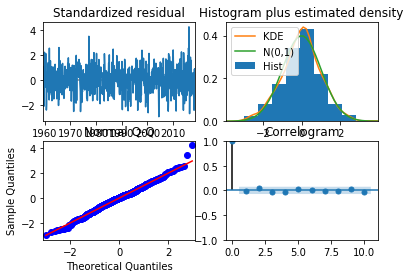

In [378]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

####SARIMA forecast

In this exercise, you will forecast the $CO_{2}$ time series up to the year 2030 to find the $CO_{2}$ levels if nothing changes.

In [0]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

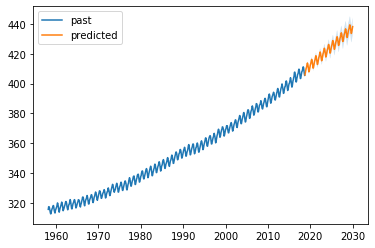

In [380]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [381]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1950947128102
lower CO2_ppm    432.111725
upper CO2_ppm    444.278464
Name: 2030-01-01 00:00:00, dtype: float64
